Welcome to my analysis on Concrete Data. From exploring the data to fitting linear models and using feature engineering and/or selection methods to improve the fit of data on the linear model. I also explored the impact of outliers on the fitting of data onto the linear model.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from scipy import stats
import numpy as np

Reading the dataset

In [4]:
dfs = pd.read_csv('../input/yeh-concret-data/Concrete_Data_Yeh.csv')

In [5]:
dfs.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
dfs.columns = ['cement', 'blast_furnace_slag', 'fly_ash','water','superplast','course_aggregate','fine_aggregate','age','compressive_strength']
#Checking for null values
dfs.isnull().sum()

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superplast              0
course_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

A quick summary of the values in the dataset. Later we will check for outliers.

In [7]:
dfs.describe()

,cement,blast_furnace_slag,fly_ash,water,superplast,course_aggregate,fine_aggregate,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Plotting the correlation heatmap for all the features of the dataset


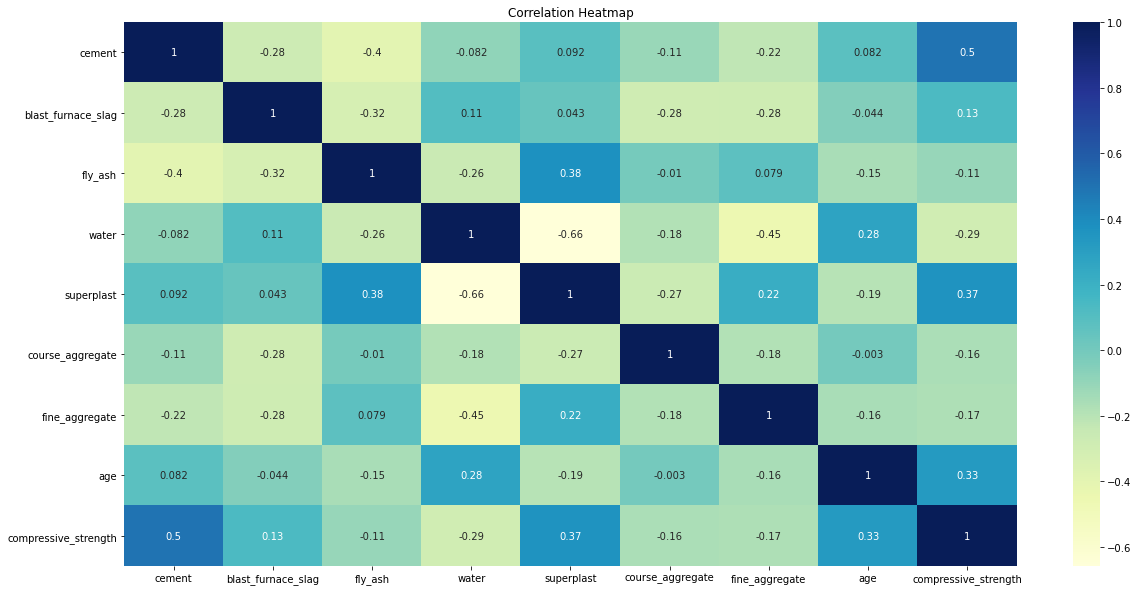

In [8]:
plt.figure(figsize = (20,10))
plt.title("Correlation Heatmap")
sns.heatmap(dfs.corr(), annot=True,cmap="YlGnBu")

## Checking for outliers
The easiest way to check for outliers is by plotting boxplots

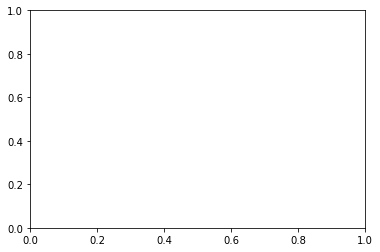

In [9]:
fig, ax = plt.subplots() #initialization

The green diamonds indicate the outlier points in the specific variable 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe791b12990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe791b1a450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe791b124d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe791b1af10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe791b23490>],
 'means': []}

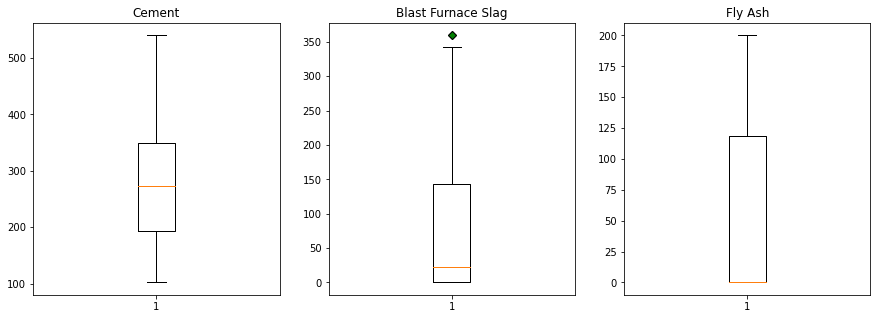

In [10]:
import matplotlib.pyplot as plt
# Green markers indicating outliers in the feature

green_diamond = dict(markerfacecolor='g', marker='D')


ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(122)
ax3 = fig.add_subplot(133)



fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.set_title('Cement')
ax1.boxplot(dfs['cement'], flierprops=green_diamond)

ax2.set_title('Blast Furnace Slag')
ax2.boxplot(dfs['blast_furnace_slag'], flierprops=green_diamond)

ax3.set_title('Fly Ash')
ax3.boxplot(dfs['fly_ash'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe79190f390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe79190fe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe791906e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe791918910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe791918e50>],
 'means': []}

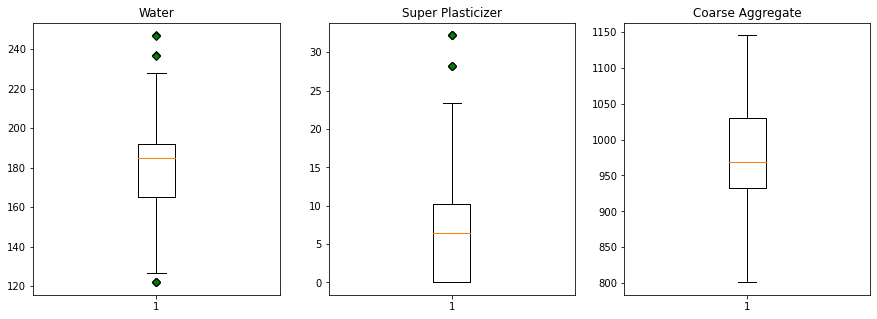

In [11]:
ax4 = fig.add_subplot(111)
ax5 = fig.add_subplot(122)
ax6 = fig.add_subplot(133)
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax4.set_title('Water')
ax4.boxplot(dfs['water'], flierprops=green_diamond)

ax5.set_title('Super Plasticizer')
ax5.boxplot(dfs['superplast'], flierprops=green_diamond)

ax6.set_title('Coarse Aggregate')
ax6.boxplot(dfs['course_aggregate'], flierprops=green_diamond)



{'whiskers': [<matplotlib.lines.Line2D at 0x7fe7902fbe10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe7903018d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe7902fb950>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe79030a3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe79030a910>],
 'means': []}

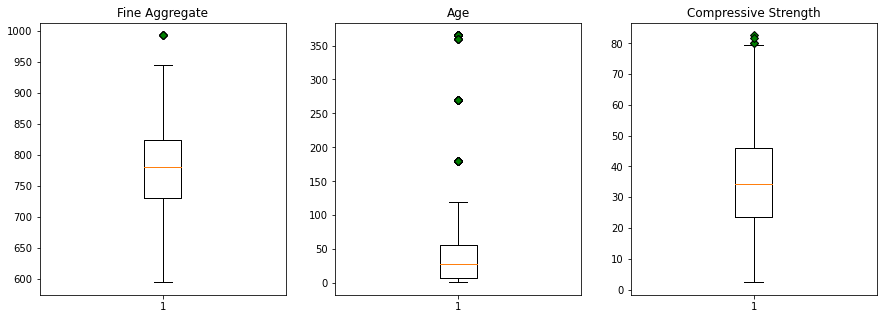

In [12]:
ax7 = fig.add_subplot(111)
ax8 = fig.add_subplot(122)
ax9 = fig.add_subplot(133)

fig, (ax7, ax8, ax9) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax7.set_title('Fine Aggregate')
ax7.boxplot(dfs['fine_aggregate'], flierprops=green_diamond)

ax8.set_title('Age')
ax8.boxplot(dfs['age'], flierprops=green_diamond)

ax9.set_title('Compressive Strength')
ax9.boxplot(dfs['compressive_strength'], flierprops=green_diamond)

As you can see there are some outliers in the data mostly in water, compression strength and age. The impact of these can be accessed during predictive modelling.

## Fitting the data onto a Linear Model

* Split the data set in train and test sets with a proprtion of 20% for test set
* Apply linear regression
* Calculate MAE, RMSE and R^2 performance metric for the above model

The following linear model is the most simple model possible. The data is blindly fitted onto the model. The error metrics are defined in the next cell

In [13]:
from sklearn.model_selection import train_test_split
X= dfs.iloc[:, dfs.columns != 'compressive_strength']
y = dfs.iloc[:, dfs.columns == 'compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicted Variable
y_pred = regressor.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

#RMSE 
rmse = mean_squared_error(y_test,y_pred, squared = False)

#R2_Score
r2 = r2_score(y_test,y_pred)
print("For a linear model the errors are as follows-")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)

For a linear model the errors are as follows-
Mean Absolute Error: 7.864641991336007
Root Mean Squared Error: 9.778403438491363
R2 Score: 0.6369606518338295


## Feature Engineering and Selection Methods

Using different techniques of feature selection and/or feature engineering to improve the performance of the model from last task. Calculate MAE, RMSE and R^2 performance metric

First, we will visualize the data and make observations about the features.

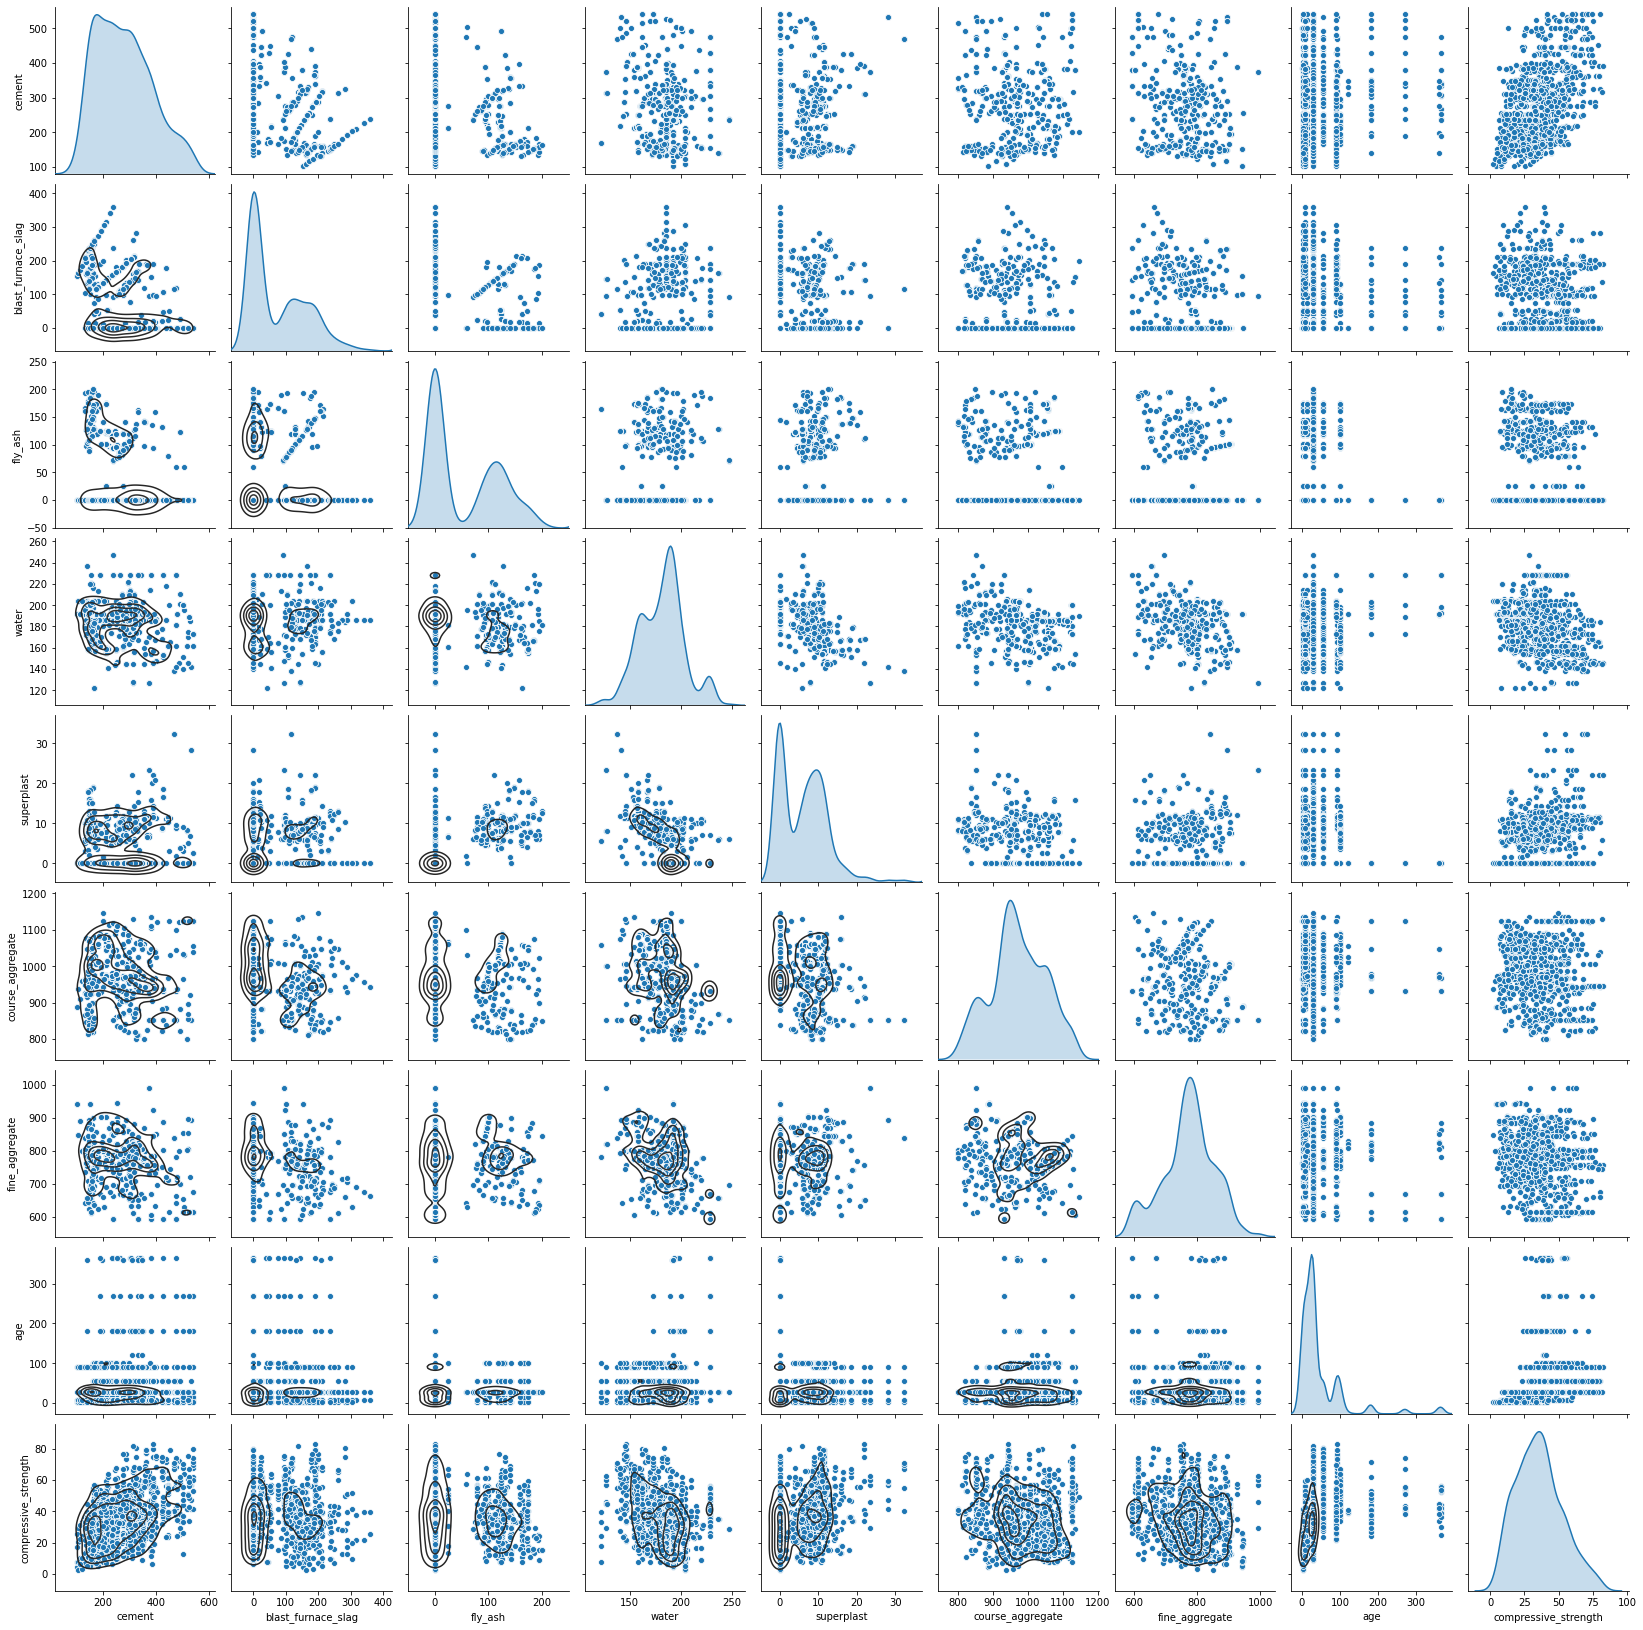

In [15]:
#Visualizing the correlation among the variables

g = sns.pairplot(dfs, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

The KDE distributions are a bit off due to the outliers in the data.

Text(0.5, 1.0, 'Compressive Strength vs Cement, Age, Water')

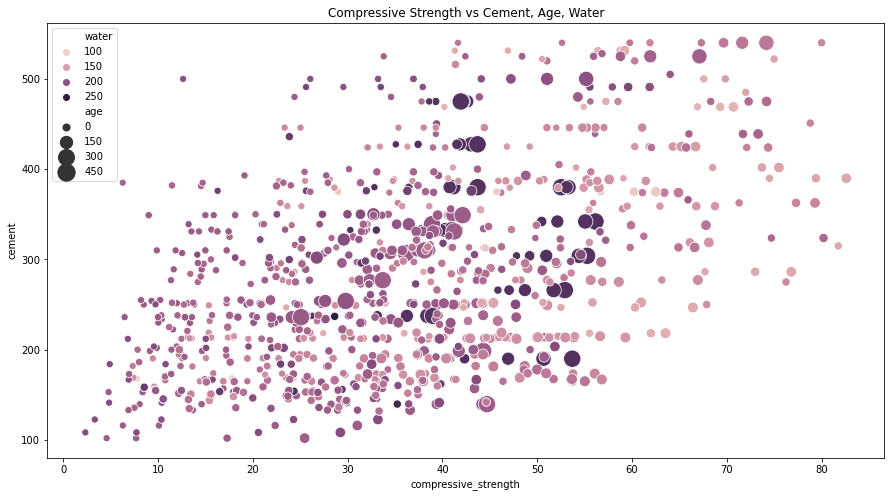

In [18]:
#Plotting a Compressive Strength vs Cement, Age, Water plot
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
x = dfs['compressive_strength']
y= dfs['cement']
sns.scatterplot(y=y, x=x, hue="water",size="age", data=dfs, sizes=(50, 300))
ax.set_title('Compressive Strength vs Cement, Age, Water')

#### Observations from the plot are:
* Compressive Strength increases when Cement composition increases.
* Compressive Strength increases with Age as darker colors indicate greater age.
* Compressive Strength increases when less Water is used.

Now the efficiency of model is accessed by first scaling the data to standardize and then removing the outliers

In [30]:
dfs = pd.read_csv('../input/yeh-concret-data/Concrete_Data_Yeh.csv')
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
dfs_scaled = pd.DataFrame(rs.fit_transform(dfs),columns = dfs.columns)

X= dfs_scaled.iloc[:, dfs.columns != 'compressive_strength']
y = dfs_scaled.iloc[:, dfs.columns == 'compressive_strength']


#Removing outliers using interquartile range
Q1 = dfs.quantile(0.25)
Q3 = dfs.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
dfs_out = dfs[~((dfs < (Q1 - 1.5 * IQR)) |(dfs > (Q3 + 1.5 * IQR))).any(axis=1)]

cement              157.625
slag                142.950
flyash              118.300
water                27.100
superplasticizer     10.200
coarseaggregate      97.400
fineaggregate        93.050
age                  49.000
csMPa                22.425
dtype: float64


In [36]:
# Pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X= dfs_out.iloc[:, [0,1,2,3,4,5,6,7]]
y = dfs_out.iloc[:, 8]

# define feature selection SELECTING THE BEST FEATURES 7 OUT OF 8
fs = SelectKBest(score_func=f_regression, k=7)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)


(941, 7)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size= 0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pre = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
maep = mean_absolute_error(y_test, y_pre)

rmsep = rmse = mean_squared_error(y_test,y_pre, squared = False)
from sklearn.metrics import r2_score
r2p = r2_score(y_test,y_pre)

print("For a linear model the errors are as follows-")
print("Mean Absolute Error:", maep)
print("Root Mean Squared Error:", rmsep)
print("R2 Score:",r2p)

For a linear model the errors are as follows-
Mean Absolute Error: 6.11151299365665
Root Mean Squared Error: 8.249287534487385
R2 Score: 0.7393376397024738


#### There is a 16% improvement over a simple linear model
Selecting the features using Feature ranking with recursive feature elimination method is used to assess the model


In [40]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X= dfs.iloc[:, dfs.columns != 'compressive_strength']
y = dfs.iloc[:, 8]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.ranking_

array([1, 1, 3, 1, 2, 5, 4, 1, 1])

Here we obtain the best ranking features using SVR estimator.
The best ranking features are: cement, blast_furnace_slag,  water, superplast and age

In [42]:
#Selecting the number 1 ranking variables only
# The variables are: cement, blast_furnace_slag,  water, superplast and age
X= dfs_out.iloc[:, [0,1,3,4,7]]
y = dfs_out.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pre = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
maef = mean_absolute_error(y_test, y_pre)

rmsef = mean_squared_error(y_test,y_pre, squared = False)
from sklearn.metrics import r2_score
r2f = r2_score(y_test,y_pre)

print("For a linear model the errors are as follows-")
print("Mean Absolute Error:", maef)
print("Root Mean Squared Error:", rmsef)
print("R2 Score:",r2f)

For a linear model the errors are as follows-
Mean Absolute Error: 6.4964592722249614
Root Mean Squared Error: 8.613331777907062
R2 Score: 0.7158237409391145


Selecting the features using Principal Component Analysis

In [44]:
X= dfs_scaled.iloc[:, dfs.columns != 'compressive_strength']
y = dfs_scaled.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pr = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error
maepca = mean_absolute_error(y_test, y_pr)

rmsepca = mean_squared_error(y_test,y_pr, squared = False)
from sklearn.metrics import r2_score
r2pca = r2_score(y_test,y_pr)

print("For a linear model the errors are as follows-")
print("Mean Absolute Error:", maepca)
print("Root Mean Squared Error:", rmsepca)
print("R2 Score:",r2pca)

For a linear model the errors are as follows-
Mean Absolute Error: 0.19723998007411905
Root Mean Squared Error: 0.25287051334245403
R2 Score: 0.8779102850770744


# **Conclusion**

Using Pearson's correlation coefficient to find the we obtain the highest Rsquared coefficient indicating a better fit fo the model. However using a different algorithm to predict the outcomes such as decision trees or random forest might be an alternative approach but they tend to overfit the data easily.

Using PCA methods with 4 features best fits the data into a linear model.

The best fitting linear model is with using PCA with R2_Score of ~0.8779

Also, it can be concluded that removal of outliers tends to improve the fit of the data onto a linear model. 


### Thank you for reading. Any suggestions or feedback is welcome!